In [1]:
import sys
import os
import io
import pickle as pck
import numpy as np
import matplotlib.pyplot as plt
import csv
import time
from IPython.display import HTML
from IPython.display import display
import seaborn as sns

%matplotlib inline

In [87]:
fname = "hu_en_char33_60_50000.txt"
fname2 = "hu_en_char11_20_100000.txt"
fname3 = "hu_en_char11_20_50000.txt"
fname4 = "hu_en_char33_20_100000.txt"

In [88]:
bleu = np.zeros((32))
pp = np.zeros((60))
i=0
j=0
with open(fname, encoding ="utf8") as f:
        line = f.readline()
        while(line != ""):
            line=f.readline()
            if ("BLEU:" in line):
                bleu[i]=line.split()[-1]
                i+=1
            if ("dev perplexity" in line):
                pp[j]=line.split()[-1]
                j+=1

In [89]:
bleu2 = np.zeros((12))
pp2 = np.zeros((20))
i=0
j=0
with open(fname2, encoding ="utf8") as f:
        line = f.readline()
        while(line != ""):
            line=f.readline()
            if ("BLEU:" in line):
                bleu2[i]=line.split()[-1]
                i+=1
            if ("dev perplexity" in line):
                pp2[j]=line.split()[-1]
                j+=1

In [95]:
bleu3 = np.zeros((12))
pp3 = np.zeros((20))
i=0
j=0
with open(fname3, encoding ="utf8") as f:
        line = f.readline()
        while(line != ""):
            line=f.readline()
            if ("BLEU:" in line):
                bleu3[i]=line.split()[-1]
                i+=1
            if ("dev perplexity" in line):
                pp3[j]=line.split()[-1]
                j+=1

In [94]:
bleu4 = np.zeros((12))
pp4 = np.zeros((20))
i=0
j=0
with open(fname4, encoding ="utf8") as f:
        line = f.readline()
        while(line != ""):
            line=f.readline()
            if ("BLEU:" in line):
                bleu4[i]=line.split()[-1]
                i+=1
            if ("dev perplexity" in line):
                pp4[j]=line.split()[-1]
                j+=1

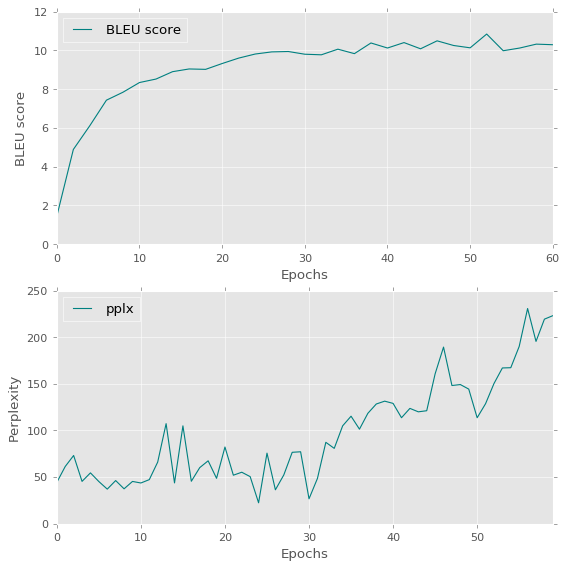

In [108]:
plt.style.use('ggplot')
#plt.style.use('classic')

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(2,1,1)
y1 = list(range(0,62,2))
# data to plot
ax.plot(y1,bleu[:-1],c = 'teal',label='BLEU score')
ax.legend(loc=2,prop={'size':12})
ax.set_xlabel('Epochs')
ax.set_ylabel('BLEU score')
ax.grid("on")
plt.xlim([0,60])
fig.set_label('Sentence lengths')
#fig.tight_layout
#fig.savefig("sentences.pdf", dpi=200)
ax2 = fig.add_subplot(2,1,2)
y2 = list(range(0,60))
# data to plot
ax2.plot(y2,pp,c = 'teal',label='pplx')
ax2.legend(loc=2,prop={'size':12})
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Perplexity')
ax2.grid("on")
plt.xlim([0,59])
fig.set_label('Sentence lengths')
fig.tight_layout
fig.savefig("60.png", dpi=200)


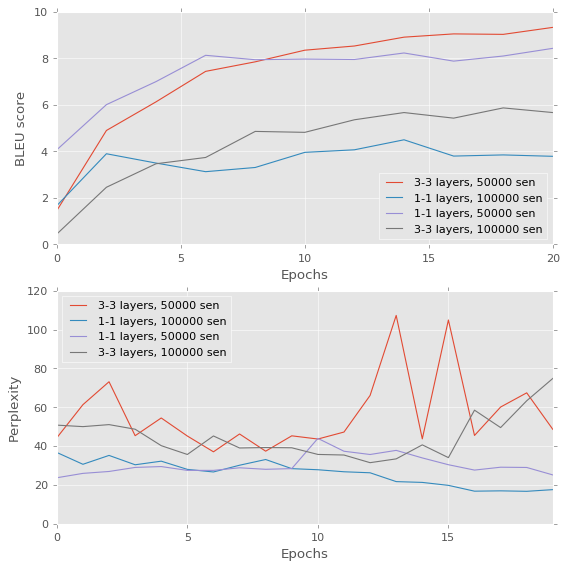

In [109]:
fig2 = plt.figure(figsize=(8, 8))
ax3 = fig2.add_subplot(2,1,1)
y3 = list(range(0,22,2))
# data to plot
ax3.plot(y3,bleu[0:11],label='3-3 layers, 50000 sen')
ax3.plot(y3,bleu2[:-1],label='1-1 layers, 100000 sen')
ax3.plot(y3,bleu3[:-1],label='1-1 layers, 50000 sen')
ax3.plot(y3,bleu4[:-1],label='3-3 layers, 100000 sen')
ax3.legend(loc=4,prop={'size':10})
ax3.set_xlabel('Epochs')
ax3.set_ylabel('BLEU score')
ax3.grid("on")
plt.xlim([0,20])
fig2.set_label('Sentence lengths')
#fig2.tight_layout
#fig.savefig("sentences.pdf", dpi=200)
ax4 = fig2.add_subplot(2,1,2)
y4 = list(range(0,20))
# data to plot
ax4.plot(y4,pp[0:20],label='3-3 layers, 50000 sen')
ax4.plot(y4,pp2,label='1-1 layers, 100000 sen')
ax4.plot(y4,pp3,label='1-1 layers, 50000 sen')
ax4.plot(y4,pp4,label='3-3 layers, 100000 sen')
ax4.legend(loc=2,prop={'size':10})
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Perplexity')
ax4.grid("on")
plt.xlim([0,19])
fig2.set_label('BLEU score and Perplexity')
fig2.tight_layout
fig2.savefig("ppx.png", dpi=200)

In [76]:
eng = os.path.join("hu_en_data2_50000", "text.en")
jp = os.path.join("hu_en_data2_50000", "text.fr")
eng2 = os.path.join("hu_en_data_100000", "text.en")
jp2 = os.path.join("hu_en_data_100000", "text.fr")
eng3 = os.path.join("hu_en_data_50000", "text.en")
jp3 = os.path.join("hu_en_data_50000", "text.fr")

In [65]:
def read_input_txt(fname):
    # define a dictionary. Each unique toke will be a key in the dictionary
    # and the value will be its count
    tokens = {}
    line_len = list()
    count = 0
    with open(fname,encoding="utf-8") as f:
        # read entire file content into buffer
        data = f.read()
    # count occurrences of each token
    for t in data.split():
        count +=1
        if t not in tokens:
            tokens[t] = 1
        else:
            tokens[t] +=1
    for ln in data.split('\n'):
        line_len.append(len(ln))
    return tokens, line_len, count

In [104]:
# Load
eng_tokens, eng_len, en_w = read_input_txt(eng)
jp_tokens, jp_len, jp_w = read_input_txt(jp)
eng_tokens2, eng_len2, en_w2 = read_input_txt(eng2)
jp_tokens2, jp_len2, jp_w2 = read_input_txt(jp2)
eng_tokens3, eng_len3, en_w3 = read_input_txt(eng3)
jp_tokens3, jp_len3, jp_w3 = read_input_txt(jp3)

In [106]:
# Count length
print("--50000: Max char lenght in hun: {0}\nMax lenght in English: {1}".format(max(jp_len), max(eng_len)))
print(en_w, jp_w)
print("--100000: Max char lenght in hun: {0}\nMax lenght in English: {1}".format(max(jp_len2), max(eng_len2)))
print(en_w2, jp_w2)
print("--BASE: Max word lenght in hun: {0}\nMax lenght in English: {1}".format(max(jp_len3), max(eng_len3)))
print(en_w3, jp_w3)

--50000: Max char lenght in hun: 491
Max lenght in English: 527
1338774 1274773
--100000: Max char lenght in hun: 569
Max lenght in English: 727
2588812 2452428
--BASE: Max word lenght in hun: 283
Max lenght in English: 323
362127 252979


In [107]:
# Count tokens unique
print("Tokens in hun: {0}\nTokens in English: {1}".format(len(jp_tokens), len(eng_tokens)))
print("Tokens in hun: {0}\nTokens in English: {1}".format(len(jp_tokens2), len(eng_tokens2)))
print("Tokens in hun: {0}\nTokens in English: {1}".format(len(jp_tokens3), len(eng_tokens3)))

Tokens in hun: 75
Tokens in English: 76
Tokens in hun: 78
Tokens in English: 83
Tokens in hun: 38896
Tokens in English: 13987


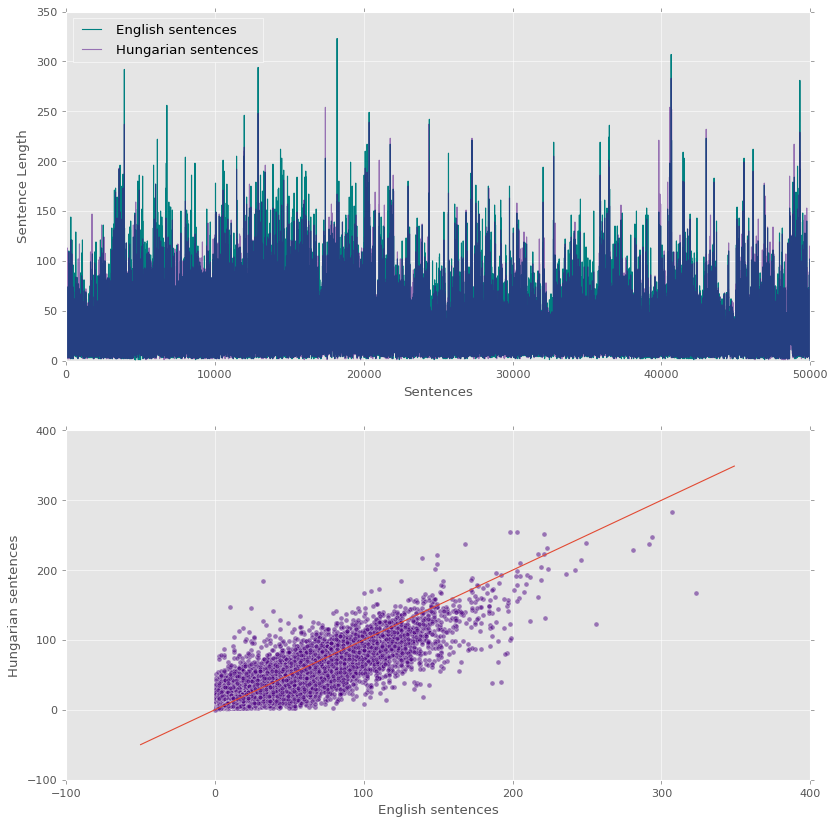

In [99]:
plt.style.use('ggplot')
#plt.style.use('classic')

# Plot distributions
fig3 = plt.figure(figsize=(12, 12))
ax33 = fig3.add_subplot(2,1,1)
y13 = list(range(0,len(eng_len3)))
y23 = list(range(0,len(jp_len3)))
# data to plot
ax33.plot(y13,eng_len3,c = 'teal',label='English sentences')
ax33.grid()
ax33.plot(y23,jp_len3,c ='indigo', alpha = 0.5, label = 'Hungarian sentences')
ax33.legend(loc=2,prop={'size':12})
ax33.set_xlabel('Sentences')
ax33.set_ylabel('Sentence Length')
ax33.grid('on')

ax23 = fig3.add_subplot(2,1,2)
ax23.grid('on')
ax23.scatter(eng_len3, jp_len3, c='indigo', alpha=0.5, label = 'Hungarian-English sentence lenghts')
ax23.plot(list(range(-50,350)),list(range(-50,350)))

ax23.set_xlabel('English sentences')
ax23.set_ylabel('Hungarian sentences')
ax23.grid('on')

fig3.set_label('Sentence lengths')
fig3.tight_layout
fig3.savefig("sentences50000.png", dpi=200)


In [5]:
output = !python -c 'help(dir)'

In [6]:
output

[]